In [37]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.calibration import calibration_curve
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from scipy.stats import pearsonr

In [38]:
# generate 2 class dataset
X, y = make_classification(n_samples=10000, n_classes=2, weights=[1,1], random_state=25)

# split into train/test sets
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.3, random_state=12)

In [39]:
# create and train model 
model = SVC()
model.fit(trainX, trainY)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## 1. no calibration

In [40]:
#predict probabilities
probs = model.decision_function(testX)
probs2 = model.predict(testX)

In [41]:
accuracy_score(probs2, testY)

0.8776666666666667

In [42]:
pearsonr(probs, testY)

(0.7451095099122368, 0.0)

In [43]:
fop, mpv = calibration_curve(testY, probs, n_bins=10, normalize=True)
fop2, mpv2 = calibration_curve(testY, probs2, n_bins=10, normalize=True)

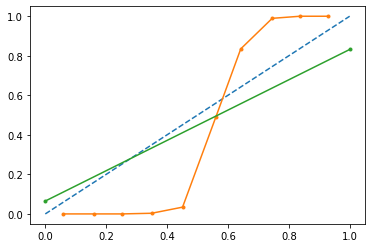

In [44]:
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(mpv, fop, marker='.')
plt.plot(mpv2, fop2, marker='.')
plt.show()

## 2. calibrated

In [45]:
from sklearn.calibration import CalibratedClassifierCV

calibrared = CalibratedClassifierCV(model, method='sigmoid', cv=5)
calibrared.fit(trainX, trainY)

CalibratedClassifierCV(base_estimator=SVC(C=1.0, break_ties=False,
                                          cache_size=200, class_weight=None,
                                          coef0=0.0,
                                          decision_function_shape='ovr',
                                          degree=3, gamma='scale', kernel='rbf',
                                          max_iter=-1, probability=False,
                                          random_state=None, shrinking=True,
                                          tol=0.001, verbose=False),
                       cv=5, method='sigmoid')

In [46]:
probs = calibrared.predict_proba(testX)[:,1]
probs2 = calibrared.predict(testX)
print(probs[:5])cal
print(probs2[:5])

[9.98975688e-03 8.28108632e-03 8.31383071e-04 9.74915768e-01
 9.91593740e-01]
[0 0 0 1 1]


In [47]:
accuracy_score(probs2, testY)

0.876

In [48]:
pearsonr(probs, testY)

(0.8144426181730432, 0.0)

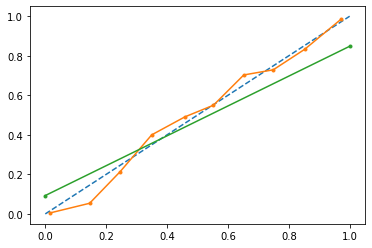

In [49]:
fop, mpv = calibration_curve(testY, probs, n_bins=10, normalize=True)
fop2, mpv2 = calibration_curve(testY, probs2, n_bins=10, normalize=True)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(mpv, fop, marker='.')
plt.plot(mpv2, fop2, marker='.')
plt.show()

Refference
* https://scikit-learn.org/stable/modules/calibration.html (explain CalibratedClassifierCV in scikit learn)
* https://medium.com/analytics-vidhya/calibration-in-machine-learning-e7972ac93555 (explain algorithm)
* https://medium.com/analytics-vidhya/probability-calibration-essentials-with-code-6c446db74265 (overconfident and under confident)